**LabML01**

Suppose that you want to predict if a specific football player will be transferred in the end of the football season. In order to do it you will try to use several techniques.

1. Run the solution
2. Complete the comments.
3. What are the main limitations of this approach?



Data Collected By Pedro Carapau

In [1]:
#
#
import pandas as pd
from sklearn import preprocessing

In [2]:
#
#
#df=pd.read_csv("jogadores1.csv",encoding='utf-8',sep=";")

url='https://raw.githubusercontent.com/masterfloss/data/main/jogadores.csv'
df=pd.read_csv(url,sep=";")
posi=pd.get_dummies(df['Posicao'], prefix='pos')

In [3]:
#
#
XfeaturesArray=zip(posi['pos_ATA'],posi['pos_DEF'],posi['pos_MED'],posi['pos_GK'],df['Minutos'],df['Idade'],df['Valor de Mercado'])
Xfeatures=list(XfeaturesArray)
Y=df['Ser Transferido']

In [4]:
#
#
from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X=standardizer.fit_transform(Xfeatures)

In [5]:
#
#
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#
#
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#
#
results = []
names = []
scoring = 'accuracy'
seed = 7

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


KNN: 0.635714 (0.086370)
NB: 0.631527 (0.079564)
SVM: 0.663424 (0.074850)


/Users/alehxh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/alehxh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/alehxh/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


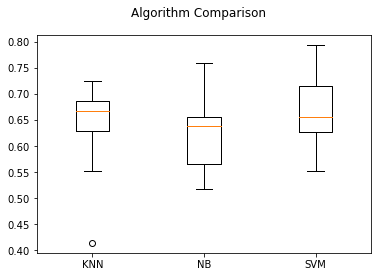

In [6]:
#
#
import matplotlib.pyplot as plt
#
#
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

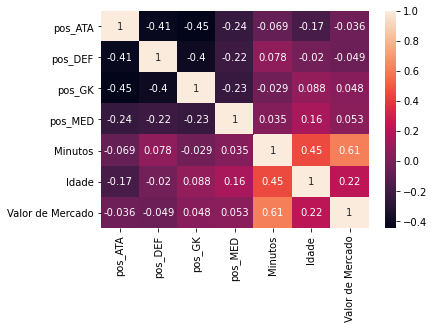

In [7]:
#
#
import seaborn as sn
import matplotlib.pyplot as plt
#
#
df1 = pd.DataFrame(X, columns=['pos_ATA','pos_DEF','pos_GK','pos_MED','Minutos','Idade','Valor de Mercado'])
corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
X

array([[-0.67965354, -0.6094494 , -0.65790259, ...,  2.16981509,
         1.80918787,  1.07928422],
       [-0.67965354, -0.6094494 , -0.65790259, ...,  2.23159071,
         2.22938635,  0.70342708],
       [-0.67965354, -0.6094494 , -0.65790259, ...,  1.6577277 ,
         2.64958482,  0.89135565],
       ...,
       [-0.67965354, -0.6094494 ,  1.51998185, ...,  1.11881668,
        -1.13220144,  1.26721279],
       [ 1.47133788, -0.6094494 , -0.65790259, ..., -1.04658143,
        -1.13220144,  0.32756994],
       [ 1.47133788, -0.6094494 , -0.65790259, ...,  1.20741593,
        -1.13220144,  5.96542706]])